In [1]:
import sys

import numpy as np
import pandas as pd

import time
from datetime import datetime, timedelta

from operator import itemgetter
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 80) 

In [3]:
df_clients = pd.read_csv("./data/df_clients_08_3.csv", sep=',', encoding='utf-8')
df_clients.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,PCL_lgbm,PCL_xgb,PCL_random_forest,PCL_logreg,PCL_catboost,Y_pred
0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.500000,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.0,0,0,0,0,0,0.540747,0.691848,0.150000,0.515698,0.214022,0.134674
1,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.250000,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.0,0,0,0,0,0,0.963965,0.998813,0.903333,0.948844,0.901804,0.700835
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.959344,0.992874,0.907778,0.910438,0.964070,0.955691
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,11.66

In [4]:
df_clients["target_sum"] = np.log(1.0 + df_clients["target_sum"])

In [5]:
df_clients.drop(filter(lambda s: s.startswith("PCL_"), df_clients.columns),
                inplace=True, axis=1)
df_clients.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.500000,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.0,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.250000,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.0,0,0,0,0,0,0.700835
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,10.475268,10.256703,7.296617,0.000000,7.003974,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.955691
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,

In [6]:
target = "target_sum"

features = filter(lambda s: s not in {
        "cl_id", "target_flag", "target_sum", "trx_datetime", "channel_type"
    }, df_clients.columns)
features = ['cl_id'] + features

features

['cl_id',
 u'FF_POS_amount_2016-10_log',
 u'FF_POS_amount_2016-11_log',
 u'FF_POS_amount_2016-12_log',
 u'FF_POS_amount_2017-01_log',
 u'FF_POS_amount_2017-02_log',
 u'FF_POS_amount_2017-03_log',
 u'FF_POS_amount_2017-04_log',
 u'FF_POS_amount_2017-05_log',
 u'FF_POS_amount_2017-06_log',
 u'FF_POS_amount_2017-07_log',
 u'FF_POS_amount_2017-08_log',
 u'FF_POS_amount_2017-09_log',
 u'FF_POS_amount_2017-10_log',
 u'FF_POS_amount_2017-11_log',
 u'FF_POS_amount_2017-12_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_2018-02_log',
 u'FF_POS_amount_2018-03_log',
 u'FF_POS_amount_2018-04_log',
 u'FF_POS_amount_quarter1_log',
 u'FF_POS_amount_quarter2_log',
 u'FF_POS_amount_quarter3_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS',
 u'FF_amount_POS_div_100_log',
 u'FF_amount_POS_div_100_mean_log',
 u'FF_amount_POS_div_100_std',
 u'FF_amount_POS_last_month_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_max_log',
 u'FF_amount_POS_mean_log',
 u'FF_amount_balanced',
 u'FF_amount_balance

## Ансамбль моделей

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFECV

In [8]:
features_remove_cl = dict()

In [9]:
use_positive_class = False

### Линейная регрессия

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [12]:
features_remove = set()

In [13]:
features_ = filter(lambda f: f not in features_remove, features)

scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=8888)

for train_index, valid_index in kf.split(df_clients_train):
    cl = LinearRegression()
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    # feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

3.8549442106876497
2.639875402659567
2.5161001899170885
7.870143101881318
4.028973677760502
MEAN: 4.182007316581225


In [14]:
features_remove_cl['logreg'] = features_remove

### Random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [17]:
features_remove = set()

In [18]:
features_ = filter(lambda f: f not in features_remove, features)

scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=8888)

for train_index, valid_index in kf.split(df_clients_train):
    cl = RandomForestRegressor(n_estimators=400, random_state=8888)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

3.127202119032918
2.096406613878907
1.8955767219191841
8.690001231937739
3.352044007254363
MEAN: 3.832246138804622


Feature ranking:
[001] Y_pred                                   0.876846255703
[002] FF_amount_POS_last_month_log             0.00472443299753
[003] cl_id                                    0.00443953311291
[004] FF_trxday_std                            0.00439393017829
[005] FF_amount_log_POS_per_month              0.00355522263859
[006] FF_amount_POS_per_month_log              0.00347829556266
[007] FF_used_period_days                      0.00240343088398
[008] FF_amount_out_log_per_day                0.00155386469701
[009] FF_amount_POS_per_month                  0.00148419397141
[010] FF_amount_in_log_per_day                 0.001478233193
[011] FF_amount_holiday_after_7_log            0.00141349740106
[012] FF_mcc_cat_5814_amount_log               0.00137411799055
[013] FF_log_amount_POS_last_month             0.00137325462376
[014] FF_mcc_top0_amount_log                   0.00129997364719
[015] FF_amount_wday_4_frac                    0.00129643731756
[016] FF_amount_wday_7_frac

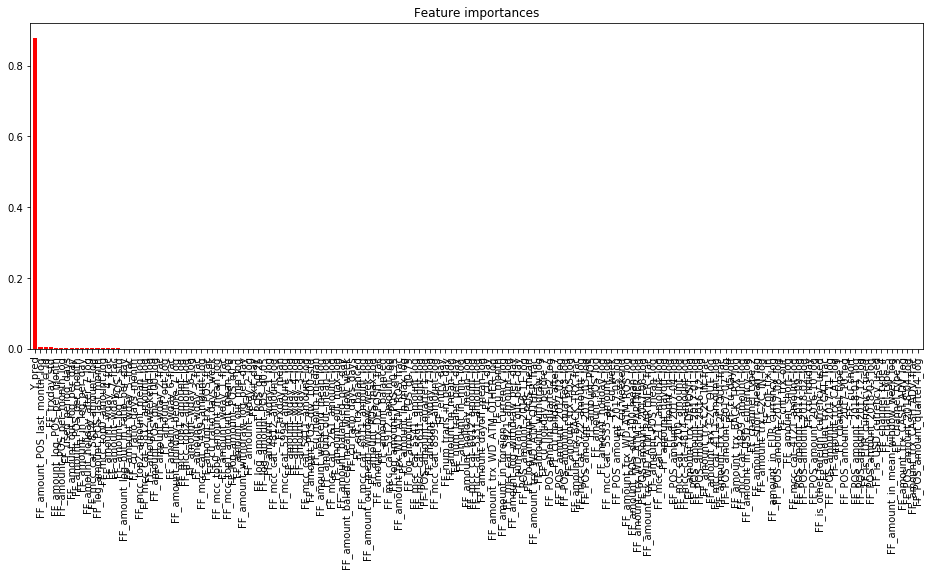

In [19]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [20]:
features_remove = set(f for f, f_im in zip(features_, importances) if f_im < 1e-4)
features_remove

{u'FF_POS_amount_2017-12_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_2018-03_log',
 u'FF_POS_amount_2018-04_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_in_mean_window_week_log',
 u'FF_amount_trx_CASH_ADV_frac',
 u'FF_amount_trx_CASH_ADV_log',
 u'FF_channel_type_3',
 u'FF_channel_type_4',
 u'FF_channel_type_5',
 u'FF_cu_short',
 u'FF_is_EUR_currency_used',
 u'FF_is_USD_currency_used'}

In [21]:
features_remove_cl['random_forest'] = features_remove

### XGBoost

In [22]:
from xgboost import XGBRegressor

In [23]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [24]:
features_remove = set()

In [25]:
features_ = filter(lambda f: f not in features_remove, features)

scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=8888)

for train_index, valid_index in kf.split(df_clients_train):
    cl = XGBRegressor(n_estimators=300, max_depth=5, random_state=8888)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

2.9099879460390756
2.2139622823100016
2.004976567550108
8.74556772763056
3.384547885535358
MEAN: 3.8518084818130207


Feature ranking:
[001] Y_pred                                   0.0811239331961
[002] cl_id                                    0.0769262611866
[003] FF_amount_log_POS_per_month              0.0172199327499
[004] FF_amount_POS_last_month_log             0.0134080946445
[005] FF_trxday_std                            0.012521927245
[006] FF_amount_out_log_per_day                0.012336823158
[007] FF_amount_wday_4_frac                    0.0120703354478
[008] FF_amount_wday_5_frac                    0.0103483255953
[009] FF_amount_wday_2_frac                    0.0101245995611
[010] FF_amount_wday_7_frac                    0.00958383269608
[011] FF_amount_POS                            0.00957242958248
[012] FF_amount_wday_1_frac                    0.00954574998468
[013] FF_POS_amount_2016-12_log                0.00951169244945
[014] FF_POS_amount_2017-03_log                0.00944731291384
[015] FF_amount_log_POS_std                    0.00942194648087
[016] FF_POS_amount_2017-04_log   

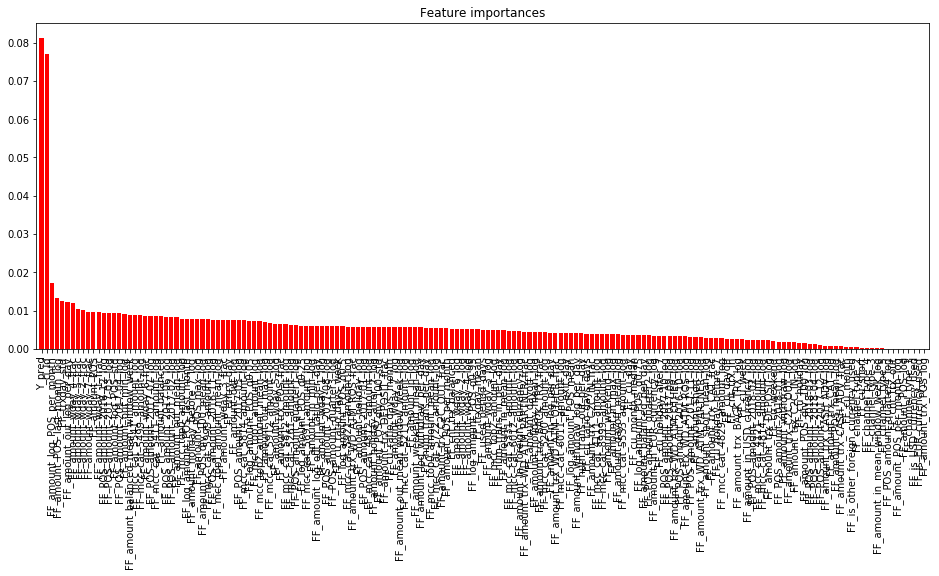

In [26]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [27]:
features_remove = set(f for f, f_im in zip(features_, importances) if f_im < 1e-4)
features_remove

{u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_per_month_log',
 u'FF_amount_trx_POS_log',
 u'FF_channel_type_1',
 u'FF_cnt_trx_out',
 u'FF_is_EUR_currency_used',
 u'FF_is_USD_currency_used'}

In [28]:
features_remove_cl['xgb'] = features_remove

### LightGBM

In [29]:
from lightgbm import LGBMRegressor

In [30]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [31]:
features_remove = set()

In [32]:
features_ = filter(lambda f: f not in features_remove, features)

scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=8888)

for train_index, valid_index in kf.split(df_clients_train):
    cl = LGBMRegressor(n_estimators=400, max_depth=7, learning_rate=0.01, random_state=8888)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

2.9328985120856665
2.142139364339233
1.9099808770217208
7.879240290568791
3.20173345930293
MEAN: 3.6131985006636684


Feature ranking:
[001] Y_pred                                   0.13947903196
[002] cl_id                                    0.0394672757503
[003] FF_trxday_std                            0.0336059654367
[004] FF_amount_log_POS_per_month              0.0279965739046
[005] FF_amount_POS_last_month_log             0.0215642476865
[006] FF_amount_in_log_per_day                 0.0155014023479
[007] FF_amount_wday_4_frac                    0.0153502510791
[008] FF_used_period_days                      0.0136036141948
[009] FF_log_amount_POS_q0.05                  0.0124951715567
[010] FF_mcc_cat_5814_amount_log               0.0124615823858
[011] FF_amount_wday_5_frac                    0.012310431117
[012] FF_mcc_top0_amount_log                   0.0119577448231
[013] FF_amount_out_log_per_day                0.0113531397477
[014] FF_cu_ratio_days_month                   0.0113027559915
[015] FF_amount_wday_1_frac                    0.0111348101372
[016] FF_amount_log_POS_std              

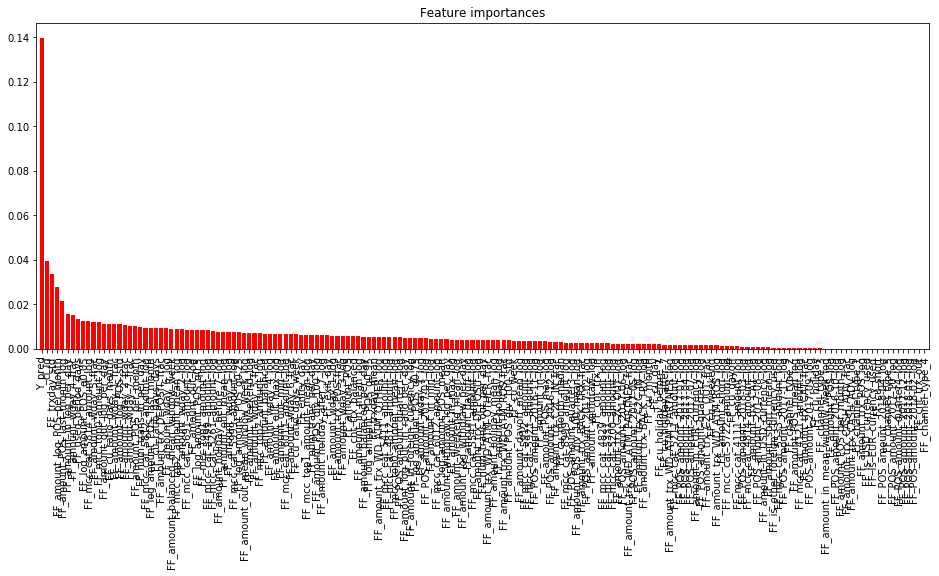

In [33]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [34]:
features_remove = set(f for f, f_im in zip(features_, importances) if f_im < 1e-4)
features_remove

{u'FF_POS_amount_2016-10_log',
 u'FF_POS_amount_2017-10_log',
 u'FF_POS_amount_2017-12_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_2018-02_log',
 u'FF_POS_amount_2018-04_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_per_month_log',
 u'FF_amount_in_mean_window_week_log',
 u'FF_amount_trx_CASH_ADV_frac',
 u'FF_amount_trx_CASH_ADV_log',
 u'FF_amount_trx_POS_log',
 u'FF_channel_type_1',
 u'FF_channel_type_4',
 u'FF_channel_type_5',
 u'FF_cnt_trx_out',
 u'FF_cu_short',
 u'FF_is_EUR_currency_used',
 u'FF_is_USD_currency_used'}

In [35]:
features_remove_cl['lgbm'] = features_remove

### CatBoost

In [36]:
from catboost import CatBoostRegressor

class CatBoostRegressorSklearnWrapper(CatBoostRegressor):
    # Обертка нужна, чтобы работал RFECV
    
    def __getattr__(self, attr):
        if attr == 'coef_':
            return np.array(self.feature_importances_)
        else:
            return object.__getattribute__(self, attr)

In [37]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_5812_amount_log,FF_mcc_cat_5814_amount_log,FF_mcc_cat_5912_amount_log,FF_mcc_cat_5921_amount_log,FF_mcc_cat_5999_amount_log,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.643790,0.000000,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,10.485589,11.319852,7.800573,0.000000,6.516193,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,8.104703,5.513429,7.498316,0.000000,6.268654,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422

In [38]:
features_remove = set()

In [39]:
features_ = filter(lambda f: f not in features_remove, features)

scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=8888)

for train_index, valid_index in kf.split(df_clients_train):
    cl = CatBoostRegressor(n_estimators=300, random_state=8888, verbose=False)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

3.1374643867528667
2.1644123238728104
1.9276632050495472
8.046043316313998
3.241544776709506
MEAN: 3.703425601739746


Feature ranking:
[001] Y_pred                                   0.914437518616
[002] FF_amount_POS_per_month_log              0.00454635888751
[003] FF_amount_log_POS_per_month              0.00410710263452
[004] cl_id                                    0.00325844454044
[005] FF_trxday_std                            0.00294462372708
[006] FF_used_period_days                      0.0027437180153
[007] FF_amount_POS_last_month_log             0.00236964390702
[008] FF_amount_out_log_per_day                0.00190017197754
[009] FF_cu_month                              0.00169343103847
[010] FF_amount_out_log                        0.00143130310519
[011] FF_amount_weekend_mean_log               0.00139460606777
[012] FF_amount_POS_div_100_log                0.00122496505996
[013] FF_amount_weekend_log                    0.00122110137283
[014] FF_cu_ratio_days_week                    0.00113577551912
[015] FF_amount_POS_per_month                  0.00109851402389
[016] FF_amount_balanced  

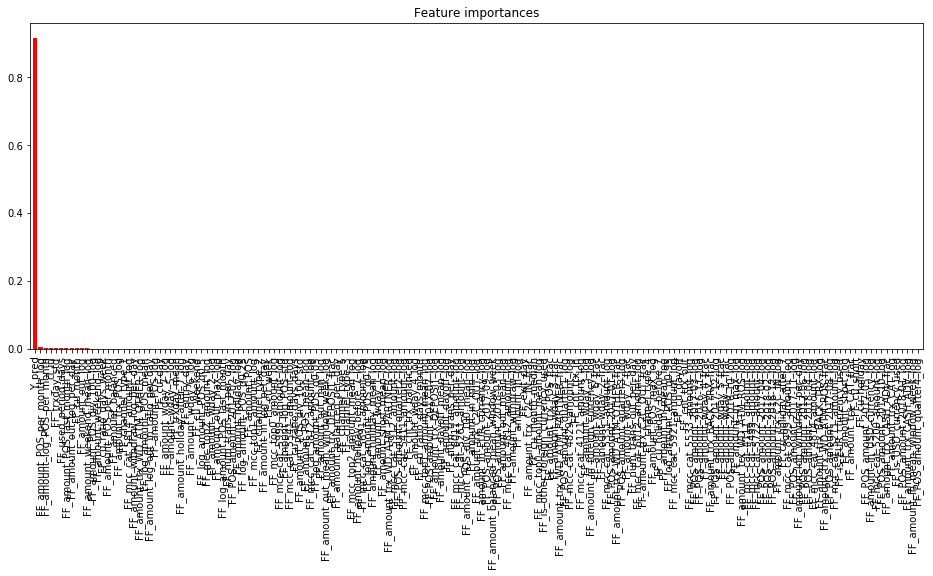

In [40]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [41]:
features_remove = set(f for f, f_im in zip(features_, importances) if f_im < 1e-4)
features_remove

{u'FF_POS_amount_2017-05_log',
 u'FF_POS_amount_2017-08_log',
 u'FF_POS_amount_2017-10_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_in_USD_currency_log',
 u'FF_amount_in_mean_window_week_log',
 u'FF_amount_short_log',
 u'FF_amount_trx_BACK_TRX_log',
 u'FF_amount_trx_CASH_ADV_frac',
 u'FF_amount_trx_CASH_ADV_log',
 u'FF_amount_trx_CAT_frac',
 u'FF_amount_trx_CAT_log',
 u'FF_amount_trx_WD_ATM_ROS_frac',
 u'FF_cu_holiday',
 u'FF_cu_short',
 u'FF_is_EUR_currency_used',
 u'FF_is_USD_currency_used',
 u'FF_mcc_cat_5200_amount_log',
 u'FF_mcc_cat_5211_amount_log'}

In [42]:
features_remove_cl['catboost'] = features_remove

### Подмешиваем предказания  классификаторов

In [43]:
ensemble_cl = {
    'logreg': LinearRegression(),
    'random_forest': RandomForestRegressor(n_estimators=300, random_state=8888),
    'xgb': XGBRegressor(n_estimators=300, max_depth=5, random_state=8888),
    'lgbm': LGBMRegressor(n_estimators=400, max_depth=7, learning_rate=0.01, random_state=8888),
    'catboost': CatBoostRegressor(n_estimators=300, random_state=8888, verbose=False),
}

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=8888)

mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]

seeds = np.random.randint(100, 10000, 3)
ensemble_cl_iter = ensemble_cl.iterkeys()
for _, train_index in kf.split(df_clients_train):
    cl_key = next(ensemble_cl_iter)
    
    features_remove = features_remove_cl[cl_key]
    
    features_ = filter(lambda f: f not in features_remove, features)
    
    df_clients_train = df_clients.loc[mask]
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X = df_clients.loc[:, features_].values
    
    Y_pred = []
    for seed in seeds:
        cl = ensemble_cl[cl_key]
        if cl_key == 'catboost':
            cl.set_params(random_seed=seed)
        elif cl_key != 'logreg':
            cl.set_params(random_state=seed)
        cl.fit(X_train, Y_train)        
        Y_pred.append(np.clip(cl.predict(X), 0, None))
    df_clients["PCL_{}".format(cl_key)] = np.mean(Y_pred, axis=0)
    
    print "{} prediction is ready...".format(cl_key)

df_clients.head()

lgbm prediction is ready...
xgb prediction is ready...
random_forest prediction is ready...
logreg prediction is ready...
catboost prediction is ready...


,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred,PCL_lgbm,PCL_xgb,PCL_random_forest,PCL_logreg,PCL_catboost
0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.500000,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.0,0,0,0,0,0,0.134674,0.038103,0.167930,0.000000,0.005709,0.000000
1,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.250000,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.0,0,0,0,0,0,0.700835,7.695997,10.294377,10.412598,5.873520,6.954900
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.955691,11.119433,12.090539,9.957065,9.503985,11.289861
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [45]:
df_clients.to_csv('data/df_clients_reg.csv', encoding='utf-8', index=False)

##  Итоговая модель

In [46]:
import xgboost as xgb
import catboost 
import lightgbm as lgbm

In [47]:
target = "target_sum"

features = filter(lambda s: s not in {
        "cl_id", "target_flag", "target_sum", "trx_datetime", "channel_type"
    }, df_clients.columns)
features = ["cl_id"] + features

features

['cl_id',
 u'FF_POS_amount_2016-10_log',
 u'FF_POS_amount_2016-11_log',
 u'FF_POS_amount_2016-12_log',
 u'FF_POS_amount_2017-01_log',
 u'FF_POS_amount_2017-02_log',
 u'FF_POS_amount_2017-03_log',
 u'FF_POS_amount_2017-04_log',
 u'FF_POS_amount_2017-05_log',
 u'FF_POS_amount_2017-06_log',
 u'FF_POS_amount_2017-07_log',
 u'FF_POS_amount_2017-08_log',
 u'FF_POS_amount_2017-09_log',
 u'FF_POS_amount_2017-10_log',
 u'FF_POS_amount_2017-11_log',
 u'FF_POS_amount_2017-12_log',
 u'FF_POS_amount_2018-01_log',
 u'FF_POS_amount_2018-02_log',
 u'FF_POS_amount_2018-03_log',
 u'FF_POS_amount_2018-04_log',
 u'FF_POS_amount_quarter1_log',
 u'FF_POS_amount_quarter2_log',
 u'FF_POS_amount_quarter3_log',
 u'FF_POS_amount_quarter4_log',
 u'FF_amount_POS',
 u'FF_amount_POS_div_100_log',
 u'FF_amount_POS_div_100_mean_log',
 u'FF_amount_POS_div_100_std',
 u'FF_amount_POS_last_month_log',
 u'FF_amount_POS_log',
 u'FF_amount_POS_max_log',
 u'FF_amount_POS_mean_log',
 u'FF_amount_balanced',
 u'FF_amount_balance

In [48]:
mask = df_clients[target].notnull()
if use_positive_class:
    mask = np.logical_and(df_clients[target] > 0.0, mask)
df_clients_train = df_clients.loc[mask]
df_clients_train.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred,PCL_lgbm,PCL_xgb,PCL_random_forest,PCL_logreg,PCL_catboost
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.861492,0.0,6.64379,0.0,0.0,0.0,0.0,0.000000,0.000000,8.964696,0.0,7821.000000,4.356709,3.283414,22.052967,6.643790,8.964696,8.521982,7.866339,-24383.000000,-2260.104167,0.000000,0.000000,8.964696,0.000000,0.000000,0.000000,0.000000,...,9.903538,10.506792,0.000000,8.521982,8.521982,7.616776,7.616776,6.643790,6.643790,0.018182,0.072727,0.090909,386.800000,21.276748,55,0,3910.500000,4.482348,27.50,27.500000,27.500000,-0.097364,0.180064,-0.194557,0.000000,-443.327273,0,0.0,0.000000,0,0,0,0,0,0.134674,0.038103,0.167930,0.000000,0.005709,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.276715,8.244991,11.878687,10.318540,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,8.953997,12.069389,0.0,182185.976007,7.481556,2.921243,60.540964,11.931104,12.112789,11.002117,7.498217,-137185.976007,-1352.140614,0.000000,0.000000,11.851599,10.857969,8.555837,7.457609,11.010297,...,11.884496,0.000000,0.000000,11.319852,7.606765,10.485589,7.541653,9.889628,7.405278,0.021505,1.096774,1.118280,344.298077,23.389849,93,1,45546.494002,3.028197,23.25,7.153846,1.823529,-0.110848,0.123243,-0.132853,0.116342,-1475.118022,0,0.0,0.000000,0,0,0,0,0,0.700835,7.695997,10.294377,10.412598,5.873520,6.954900
5,0.0,0.0,0.0,0.0,0.0,10.853394,11.676312,10.416270,11.417794,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,12.040357,11.730638,0.000000,0.0,293778.468834,7.965893,3.293833,58.777212,11.442013,12.590585,10.936050,7.881429,-261666.848834,-2153.340938,9.466186,7.857057,12.421177,10.864421,9.466186,7.857057,8.110892,...,12.245298,10.430562,0.000000,10.772384,7.339025,11.289507,8.724708,8.881517,6.803047,0.053763,1.473118,1.526882,209.950704,27.567667,93,5,73444.617208,3.147646,23.25,6.642857,1.550000,-0.115423,0.127715,-0.138852,0.121123,-2813.622030,0,1.0,12.695305,0,0,0,0,0,0.984256,12.113319,11.517629,12.123395,11.453436,12.085324
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.059634,7.699430,7.352441,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,9.422713,0.000000,0.0,12365.090000,4.820282,1.656585,10.005910,7.352441,9.42

In [49]:
params_cl = dict()

In [50]:
features_remove = features_remove_cl['xgb']

features_ = filter(lambda f: f not in features_remove, features)

In [51]:
%%time

params = {
    'max_depth': 5,
    'learning_rate': 0.001,
    'silent': 0,
    'objective': 'reg:linear',
    'subsample': 0.6,
    'colsample_bytree': 0.8,
    'seed': 8888,
}

X_train = xgb.DMatrix(df_clients_train.loc[:, features], label=df_clients_train.loc[:, target])

trees = 10000
cv = xgb.cv(params, X_train, metrics=('rmse'), show_stdv=True,
            num_boost_round=trees, nfold=5, early_stopping_rounds=150)

CPU times: user 29min 30s, sys: 6.48 s, total: 29min 37s
Wall time: 29min 42s


test-rmse-mean     1.564095
test-rmse-std      0.115904
train-rmse-mean    0.861679
train-rmse-std     0.014532
Name: 8777, dtype: float64


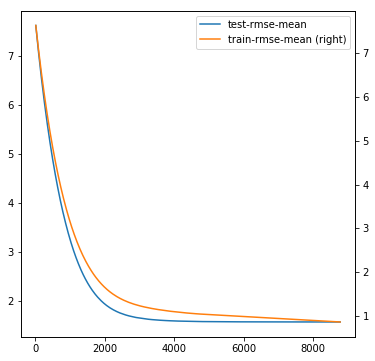

In [52]:
cv[10:].plot(figsize=(6, 6), y=['test-rmse-mean', 'train-rmse-mean'], secondary_y='train-rmse-mean')
print (cv.loc[cv['test-rmse-mean'].values.argmin()])
trees = cv['test-rmse-mean'].values.argmin()

In [53]:
params['n_estimators'] = trees

In [54]:
scores = []
feature_importances = []

kf = KFold(n_splits=5, shuffle=True, random_state=7777)

for train_index, valid_index in kf.split(df_clients_train):
    cl = XGBRegressor(**params)
    
    X_train = df_clients_train.iloc[train_index].loc[:, features_].values
    Y_train = df_clients_train.iloc[train_index].loc[:, target].values
    
    X_valid = df_clients_train.iloc[valid_index].loc[:, features_].values
    Y_valid = df_clients_train.iloc[valid_index].loc[:, target].values
    
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    
    feature_importances.append(cl.feature_importances_)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print scores[-1]
    
print "=" * 30
print "MEAN:", np.mean(scores)

2.19663291117151
2.5724293653077486
2.284420312818104
2.753775028522151
2.629846574804946
MEAN: 2.487420838524892


Feature ranking:
[001] PCL_logreg                               0.0634847506881
[002] cl_id                                    0.06234677881
[003] PCL_catboost                             0.0512739308178
[004] PCL_lgbm                                 0.0511299371719
[005] PCL_xgb                                  0.0492013767362
[006] Y_pred                                   0.048495657742
[007] PCL_random_forest                        0.0454998165369
[008] FF_amount_log_POS_per_month              0.0116960853338
[009] FF_amount_POS                            0.010834668763
[010] FF_trxday_std                            0.0101310517639
[011] FF_POS_amount_2017-06_log                0.00987434480339
[012] FF_amount_balanced                       0.00960337836295
[013] FF_POS_amount_2016-11_log                0.00947208702564
[014] FF_POS_amount_2016-12_log                0.00893452949822
[015] FF_POS_amount_2017-03_log                0.00789039023221
[016] FF_amount_POS_last_month_log   

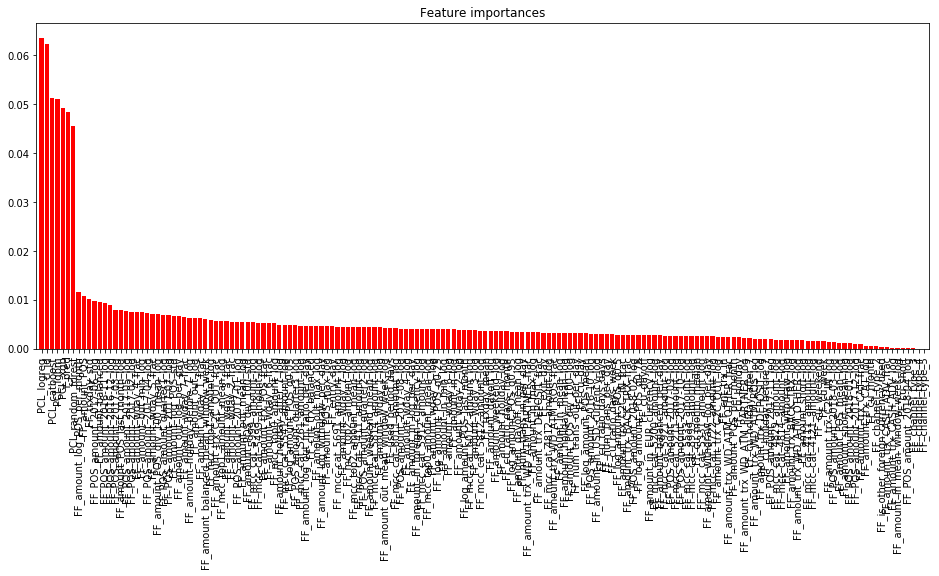

In [55]:
features_ = np.array(features_)

importances = np.mean(feature_importances, axis=0)
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1]

print "Feature ranking:"

n_features = len(features_)

for f in range(n_features):
    print "[{:03}] {:40} {}".format(f + 1, features_[indices[f]], importances[indices[f]])
    
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color="r", align="center")
plt.xticks(range(n_features), features_[indices], rotation='vertical')
plt.xlim([-1, n_features])
plt.show()

In [56]:
params_cl['xgb'] = params

In [57]:
raise Exception()

Exception: 

In [58]:
mask = df_clients[target].isnull()
if use_positive_class:
    mask = np.logical_and(df_clients["Y_pred"] > 0.5, mask)
df_clients_test = df_clients.loc[mask]
df_clients_test.head()

,FF_POS_amount_2016-10_log,FF_POS_amount_2016-11_log,FF_POS_amount_2016-12_log,FF_POS_amount_2017-01_log,FF_POS_amount_2017-02_log,FF_POS_amount_2017-03_log,FF_POS_amount_2017-04_log,FF_POS_amount_2017-05_log,FF_POS_amount_2017-06_log,FF_POS_amount_2017-07_log,FF_POS_amount_2017-08_log,FF_POS_amount_2017-09_log,FF_POS_amount_2017-10_log,FF_POS_amount_2017-11_log,FF_POS_amount_2017-12_log,FF_POS_amount_2018-01_log,FF_POS_amount_2018-02_log,FF_POS_amount_2018-03_log,FF_POS_amount_2018-04_log,FF_POS_amount_quarter1_log,FF_POS_amount_quarter2_log,FF_POS_amount_quarter3_log,FF_POS_amount_quarter4_log,FF_amount_POS,FF_amount_POS_div_100_log,FF_amount_POS_div_100_mean_log,FF_amount_POS_div_100_std,FF_amount_POS_last_month_log,FF_amount_POS_log,FF_amount_POS_max_log,FF_amount_POS_mean_log,FF_amount_balanced,FF_amount_balanced_mean_window_week,FF_amount_dayoff_log,FF_amount_dayoff_mean_log,FF_amount_holiday_after_7_log,FF_amount_holiday_before_7_log,FF_amount_holiday_log,FF_amount_holiday_mean_log,FF_amount_in_EUR_currency_log,...,FF_mcc_cat_6011_amount_log,FF_mcc_cat_6012_amount_log,FF_mcc_cat_8999_amount_log,FF_mcc_top0_amount_log,FF_mcc_top0_amount_mean_log,FF_mcc_top1_amount_log,FF_mcc_top1_amount_mean_log,FF_mcc_top2_amount_log,FF_mcc_top2_amount_mean_log,FF_num_trans_in_per_day,FF_num_trans_out_per_day,FF_num_trans_per_day,FF_trxday_mean,FF_trxday_std,FF_used_period_days,cl_id,FF_amount_POS_per_month,FF_amount_POS_per_month_log,FF_cu_ratio_days_month,FF_cu_ratio_days_week,FF_cu_ratio_days_days,FF_amount_log_out_in_ratio_per_day,FF_amount_in_log_per_day,FF_amount_out_log_per_day,FF_amount_withdraw_log_per_day,FF_amount_balanced_per_day,channel_type,target_flag,target_sum,FF_channel_type_1,FF_channel_type_2,FF_channel_type_3,FF_channel_type_4,FF_channel_type_5,Y_pred,PCL_lgbm,PCL_xgb,PCL_random_forest,PCL_logreg,PCL_catboost
2,0.0,0.0,0.0,0.0,10.763,10.782968,11.231806,9.80669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.048980,9.806690,0.000000,0.0,189077.720000,7.503290,2.430098,18.467791,11.436245,12.149919,9.343997,6.986053,-319237.720000,-1882.561297,8.364275,6.978680,11.671427,11.408288,8.600799,6.809959,0.000000,...,11.827013,0.000000,8.967632,10.256703,6.215616,10.475268,6.949839,9.637893,7.073726,0.033333,2.177778,2.211111,164.095477,24.412200,90,2,47269.430000,3.037480,22.500000,6.428571,1.363636,-0.116983,0.094044,-0.140983,0.131165,-3547.085778,0,NaN,NaN,0,0,0,0,0,0.955691,11.119433,12.090539,9.957065,9.503985,11.289861
3,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,10.829107,10.699439,9.968908,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.662636,0.000000,0.0,116148.770000,7.025538,2.735033,25.194535,10.842127,11.662636,9.679969,7.306590,-120848.770000,-1193.899641,7.917172,6.819288,11.446676,10.050225,7.917172,6.819288,0.000000,...,10.707751,11.289794,0.000000,8.884879,5.796740,9.557136,7.073006,8.802522,6.724133,0.027027,1.270270,1.297297,276.197917,21.313509,74,3,38716.256667,3.887545,24.666667,6.727273,1.644444,-0.109553,0.151693,-0.164664,0.144699,-1633.091486,0,NaN,NaN,0,0,0,0,0,0.949928,10.805679,10.853882,9.916527,11.833495,10.285256
4,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.663345,11.447611,12.224181,6.620073,12.605469,0.000000,0.000000,0.0,298183.982477,7.978996,3.043870,93.975564,12.220000,12.605469,11.632488,7.622349,-351133.982477,-2397.152556,9.934969,7.227597,12.380174,11.040348,9.220523,7.024090,9.483662,...,10.855165,7.048386,8.963416,9.713597,6.219023,10.987075,7.942891,9.836118,7.197756,0.000000,2.590164,2.590164,508.411392,17.876480,61,4,74545.995619,3.151367,15.250000,6.777778,1.326087,-0.127689,0.000000,-0.209327,0.177954,-5756.294795,0,NaN,NaN,0,0,0,0,0,0.876383,11.481788,11.098987,10.072813,6.554546,10.175926
6,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00000,0.000000,11.073688,11.228872,10.809534,5.843544,0.000000,0.0,0.000000,0.000000,0.00000

In [59]:
X_test = df_clients_test.loc[:, features_].values

In [60]:
for f in ["FF_amount_POS_last_month_log", "FF_amount_POS_per_month_log"]:
    if f not in features_:
        sys.stderr.write('Feature {} IS NOT used!\n'.format(f))
    else:
        sys.stderr.write('Feature {} IS used!\n'.format(f))

Feature FF_amount_POS_last_month_log IS used!
Feature FF_amount_POS_per_month_log IS NOT used!


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
scores, Y_pred_test = [], []

for seed in np.random.randint(100, 10000, 10):    
    X_train, X_valid, Y_train, Y_valid = train_test_split(
        df_clients_train.loc[:, features_].values,
        df_clients_train.loc[:, target].values,
        test_size=0.2, random_state=seed)
    
    cl = XGBRegressor(**params_cl['xgb'])
    cl.fit(X_train, Y_train)
    Y_pred = np.clip(cl.predict(X_valid), 0, None)
    scores.append(mean_squared_error(Y_valid, Y_pred))
    print "seed={:4d}; mse={}".format(seed, scores[-1])
    
    Y_pred = np.clip(cl.predict(X_test), 0, None)
    Y_pred_test.append(Y_pred)
    
print "=" * 30
print "MEAN:", np.mean(scores)

Y_pred = np.mean(Y_pred_test, axis=0)
assert len(Y_pred) == df_clients_test.shape[0] 

seed=7690; mse=2.95536877161
seed= 880; mse=2.41796311533
seed=3402; mse=2.69326142118
seed=9813; mse=2.78068283705
seed= 202; mse=3.25881847739
seed=4265; mse=3.29791182244
seed=4538; mse=2.61559221599
seed=8354; mse=2.5756696376
seed=5798; mse=3.06813620268
seed= 159; mse=2.74429632397
MEAN: 2.8407700825240507


In [63]:
df_pred = zip(df_clients_test["cl_id"], Y_pred)
df_pred = pd.DataFrame(df_pred, columns=['cl_id', 'pred'])
df_pred.head()

,cl_id,pred
0,2,11.233271
1,3,10.523020
2,4,10.943382
3,6,11.832575
4,7,11.002864


In [64]:
df_pred = pd.merge(
    pd.DataFrame(df_clients.loc[df_clients[target].isnull(), "cl_id"]),
    df_pred, how='left', on='cl_id'
)
df_pred["pred"].fillna(0.0, inplace=True)

assert (df_pred["pred"] >= 0).all()
assert df_pred.notnull().all().all()

In [65]:
df_pred["pred"] = np.exp(df_pred["pred"]) - 1.0
df_pred.sort_values(by="cl_id", inplace=True)
df_pred.head()

,cl_id,pred
0,2,75603.466805
1,3,37160.174190
2,4,56577.382872
3,6,137663.499960
4,7,60044.860083


In [66]:
df_pred.to_csv('submission_08_ensemble_regr-02.csv', sep=',', encoding='utf-8', index=False)

In [67]:
with open('features_08_ensemble_regr-02.txt', mode='w') as f_features:
    for f in features:
        f_features.write(f + '\n')